In [2]:
#--------------------------------------------------------------------------------------------------------------
# Import necessary modules 
#--------------------------------------------------------------------------------------------------------------
import sys
from qiskit import QuantumProgram
from qiskit import QISKitError
import Qconfig
from random import randint
import numpy as np
import qiskit
from pprint import pprint

Q_program = QuantumProgram()
Q_program.set_api(Qconfig.APItoken, Qconfig.config['url']) # set the APIToken and API url
pprint(Q_program.available_backends())

config = {'noise_params': {'CX': {'p_depol': 0.05}, 'U': {'p_depol': 0.05}, "readout_error": [0.06, 0.06] }}
backend = 'ibmqx5'
shots = 1


global zero
global one

if backend == 'local_qiskit_simulator' or backend == 'local_qasm_simulator' :
    zero = '0'
    one = '1'
    
if backend == 'ibmqx5':
    zero = '0000000000000000'
    one = '0000000000001000'
    one_p = '0000000000000100'
    one_s = '0000000000010000'

    

    
a=2
filename = 'a2_counts.npy'    
count_period = np.zeros(7) # store counts of period found


NameError: name 'QuantumProgram' is not defined

# Backend status

In [53]:
pprint(Q_program.get_backend_status('ibmqx5'))

/anaconda/lib/python3.6/site-packages/qiskit/_quantumprogram.py:909: DeprecationWarning: get_backend_status() will be deprecated in upcoming versions (>0.5.0). Using qiskit.backends.get_backend_instance('name').status instead is recommended.
  "instead is recommended.", DeprecationWarning)


{'available': True, 'backend': 'ibmqx5', 'pending_jobs': 1}


In [3]:
pprint(Q_program.get_backend_calibration(backend))

{'backend': 'ibmqx5',
 'last_update_date': '2018-04-16T11:41:06.000Z',
 'multi_qubit_gates': [{'gateError': {'date': '2018-04-16T11:41:06Z',
                                      'value': 0.04820848101396921},
                        'name': 'CX1_0',
                        'qubits': [1, 0],
                        'type': 'CX'},
                       {'gateError': {'date': '2018-04-16T11:03:25Z',
                                      'value': 0.04487502237854807},
                        'name': 'CX1_2',
                        'qubits': [1, 2],
                        'type': 'CX'},
                       {'gateError': {'date': '2018-04-16T11:03:25Z',
                                      'value': 0.03227994217701324},
                        'name': 'CX2_3',
                        'qubits': [2, 3],
                        'type': 'CX'},
                       {'gateError': {'date': '2018-04-16T11:03:25Z',
                                      'value': 0.043241229407384396},
      

# Main Algorithm


In [ ]:
import numpy as np
# import basic plot tools
from qiskit.tools.visualization import plot_histogram

a=2 #pick base to run the period finding algorithm
N = 15 #number to factor in the product of two primes
filename = 'a2_counts.npy' #store results of runs   
count_period = np.zeros(8) #store counts of period found



for j in range(100):
    print('RUN #', j)


    #AVOID RUNNING FIRST STAGE WHICH HAS DETERMINISTIC OUTPUT = 0
    c0 = a_4_mod_N(a)

    c1 = a_2_mod_N(a,c0)


    c2 = a_1_mod_N(a,c0,c1)


    period_a = find_period(c0,c1,c2)



    #ACCUMULATE STATISTICS
    count_period = count_data(period_a, count_period)

    if j%10 == 0:
        print(count_period)

        print('saving data')
        save_data(count_period, backend)
        add_to_total(backend)
        count_period = np.zeros(8)


print(count_period)

print('saving data')
save_data(count_period, backend)
add_to_total(backend)


# First stage: a^4 mod N = Id

In [102]:

def a_4_mod_N(base):
    qp = QuantumProgram()
    qr = qp.create_quantum_register('qr', 5)
    cr = qp.create_classical_register('cr', 1)

    qc = qp.create_circuit('Period_Finding', [qr], [cr])

    # Get the circuit and the registers by name 
    Shor = qp.get_circuit('Period_Finding')
    Q_reg = qp.get_quantum_register('qr')
    C_reg = qp.get_classical_register('cr')



    #rotates period register
    Shor.h(Q_reg[4])
    
    #prepares input state of computational register
    Shor.x(Q_reg[0])

    #rotate and measure period register
    Shor.h(Q_reg[4])
    Shor.measure(Q_reg[4],C_reg[0])



    #NOISE SIMULATOR
    simulate = qp.execute(["Period_Finding"], backend=backend, shots=1,timeout=500, config=config)
    data = simulate.get_counts("Period_Finding") 

    #collects counts for the value of the first bit of the estimated phase
    for i in data.keys():
        if (i == zero):
            #b0 = data[i]
            bit0='0'
            #print(a0)
        if i == one or i == one_p or i == one_s :
            #b1 = data[i]
            bit0='1'
            #print(a1)



    return bit0

# Second stage: a^2 mod N

In [103]:
def a_2_mod_N(base, bit0):
    
    qp = QuantumProgram()
    qr = qp.create_quantum_register('qr', 5)
    cr = qp.create_classical_register('cr', 1)

    qc = qp.create_circuit('Period_Finding', [qr], [cr])

    # Get the circuit and the registers by name 
    Shor = qp.get_circuit('Period_Finding')
    Q_reg = qp.get_quantum_register('qr')
    C_reg = qp.get_classical_register('cr')



    #rotates period register
    Shor.h(Q_reg[4])
    
    #prepares initial state of the computational register
    Shor.x(Q_reg[0])


    if base != 11 and base != 4 and base != 14:

        #modular exponentiation on computational register
        Shor.cx(Q_reg[4], Q_reg[0])
        Shor.cx(Q_reg[4], Q_reg[2])

        
        #rotates period register based on the value of the value measured in the previous stage
        if bit0 == '1':
            Shor.u1(np.pi/2.0,Q_reg[4])       
        
        #rotates and measure period register
        Shor.h(Q_reg[4])
        Shor.measure(Q_reg[4],C_reg[0])



        #executes
        simulate = qp.execute(["Period_Finding"], backend=backend, shots=shots,timeout=500, config=config)
        data = simulate.get_counts("Period_Finding") 

        #collects counts for the value of the second bit of the estimated phase
        for i in data.keys():
            if (i == zero):
                #b0 = data[i]
                bit1='0'
                #print(a0)
            if i == one or i == one_p or i == one_s:
                #b1 = data[i]
                bit1='1'
                #print(a1)

    if base == 11 or base == 4 or base == 14:
        
        #identity operation on computational register
        
        #rotates period register based on the value of the value measured in the previous stage
        if bit0 == '1':
            Shor.u1(np.pi/2.0,Q_reg[4])
        
        #rotates and measure period register
        Shor.h(Q_reg[4])
        Shor.measure(Q_reg[4],C_reg[0])
        
        
        
        #executes
        simulate = qp.execute(["Period_Finding"], backend=backend, shots=shots,timeout=500, config=config)
        data = simulate.get_counts("Period_Finding") 

        #collects counts for the value of the second bit of the estimated phase
        for i in data.keys():
            if (i == zero):
                #b0 = data[i]
                bit1='0'
                #print(a0)
            if i == one or i == one_p or i == one_s:
                #b1 = data[i]
                bit1='1'
                #print(a1)
                
            
    return bit1



# Third stage: a^1 mod N

In [104]:

def a_1_mod_N(base,bit0,bit1):    
    qp = QuantumProgram()
    qr = qp.create_quantum_register('qr', 5)
    cr = qp.create_classical_register('cr', 1)

    qc = qp.create_circuit('Period_Finding', [qr], [cr])

    # Get the circuit and the registers by name 
    Shor = qp.get_circuit('Period_Finding')
    Q_reg = qp.get_quantum_register('qr')
    C_reg = qp.get_classical_register('cr')
    
    #rotates period register
    Shor.h(Q_reg[4])

    #prepares initial state of the computational register
    Shor.x(Q_reg[0])
    Shor.h(Q_reg[2])
    Shor.cx(Q_reg[2], Q_reg[0])
    
    #base dependent modular exponentiation on computational register
    #2mod15
    if base == 2:
        Shor.cswap(Q_reg[4], Q_reg[3], Q_reg[2])
        Shor.cswap(Q_reg[4], Q_reg[1], Q_reg[0])

    #4mod15
    if base == 4:
        Shor.cx(Q_reg[4], Q_reg[2])
        Shor.cx(Q_reg[4], Q_reg[0])

    #7mod15    
    if base == 7:
        Shor.cswap(Q_reg[4], Q_reg[3], Q_reg[0])
        Shor.cswap(Q_reg[4], Q_reg[2], Q_reg[1])
        Shor.cx(Q_reg[4], Q_reg[3])
        Shor.cx(Q_reg[4], Q_reg[2])
        Shor.cx(Q_reg[4], Q_reg[1])
        Shor.cx(Q_reg[4], Q_reg[0])

    #8mod15
    if base == 8:
        Shor.cswap(Q_reg[4], Q_reg[3], Q_reg[0])
        Shor.cswap(Q_reg[4], Q_reg[2], Q_reg[1]) 

    #11mod15
    if base == 11:
        Shor.cx(Q_reg[4], Q_reg[3])
        Shor.cx(Q_reg[4], Q_reg[1])    

    #13mod15
    if base == 13:
        Shor.cswap(Q_reg[4], Q_reg[3], Q_reg[2])
        Shor.cswap(Q_reg[4], Q_reg[1], Q_reg[0])
        Shor.cx(Q_reg[4], Q_reg[3])
        Shor.cx(Q_reg[4], Q_reg[2])
        Shor.cx(Q_reg[4], Q_reg[1])
        Shor.cx(Q_reg[4], Q_reg[0])

    #14mod15
    if base == 14:
        Shor.cx(Q_reg[4], Q_reg[3])
        Shor.cx(Q_reg[4], Q_reg[2])
        Shor.cx(Q_reg[4], Q_reg[1])
        Shor.cx(Q_reg[4], Q_reg[0])

    #rotates period register based on the value of the value measured in the second stage
    if bit1 == '1':
        Shor.u1(np.pi/2.0,Q_reg[4])

    #rotates period register based on the value of the value measured in the first stage
    if bit0 == '1':
        Shor.u1(np.pi/4.0,Q_reg[4])
    
    #rotates and measure period register
    Shor.h(Q_reg[4])
    Shor.measure(Q_reg[4],C_reg[0])




    #executes
    simulate = qp.execute(["Period_Finding"], backend=backend, shots=shots,timeout=500, config=config)
    data = simulate.get_counts("Period_Finding") 


    #collects counts for the value of the second bit of the estimated phase
    for i in data.keys():
        if (i == zero):
            #c0 = data[i]
            bit2 ='0'
            #print(a0)
        if i == one or i == one_p or i == one_s:
            #c1 = data[i]
            bit2 = '1'
            #print(a1)

    #print(c2)
    return bit2

## Find period

In [10]:
def find_period(bit0,bit1,bit2):

    r = int(bit2)*2**(2)+int(bit1)*2**(1)+int(bit0)*2**(0)
    print('period ',r)
    
    return r

# Stores counts of periods found

In [11]:
def count_data(period,counter):
    for i in range(len(counter)):
        if period == i:
            counter[i] += 1
    
    return counter
    

# Plots Histogram

In [9]:
def plot_hist(counter):
    hist = {}
    hist['0'] = counter[0]
    hist['1'] = counter[1]
    hist['2'] = counter[2]
    hist['3'] = counter[3]
    hist['4'] = counter[4]
    hist['5'] = counter[5]
    hist['6'] = counter[6]

    plot_histogram(hist)

# Save data to file

In [85]:
def save_data(counter,back):
    print(counter)

    if back == 'ibmqx5':
        np.save('counts_exp.npy', counter)
        print('saved', counter)

# Adds to total counts

In [86]:
def add_to_total(back):
    if back == 'ibmqx5':
        counts_load = np.load('counts_exp.npy')
        counts_load_total = np.load(filename)


        total_counts = (counts_load + counts_load_total )
        print('total',total_counts)

        np.save(filename, total_counts)

# Histogram of all collected data

In [5]:
#load data
a2 = np.load("a2_counts.npy")
a4 = np.load("a4_counts.npy")
a7 = np.load("a7_counts.npy")
a8 = np.load("a8_counts.npy")
a11 = np.load("a11_counts.npy")
a13 = np.load("a13_counts.npy")
a14 = np.load("a14_counts.npy")

print(a2)
print(a11)


[253.   8. 211.  11. 248.   8. 254.   7.]
[455.  13.  20.   9. 469.  12.  15.   7.]


In [36]:
# generates array from data which can be plot as histogram in matplotlib

from matplotlib.patches import Rectangle

def gen_hist_vector(x):
    
    # finds total amount of occurrences
    counts = 0 
    for i in range(len(x)):
        counts += x[i]
    #print(counts)
    
    #normalizes the data from 0 to 1000
    for i in range(len(x)):
        x[i] = x[i]/counts*1000

        
    # creates a vector where each occurrence is contained N times (N is the number it occurred)
    # ex. if 0 occured 3 times and 4 occurred 5 times, creates: [0,0,0,4,4,4,4,4]
    hist_x = np.zeros(int(1005))

    counter = 0 
    for i in range(len(x)):
        for j in range(int(x[i])):
            hist_x[counter] = i
            counter += 1

    #print(hist_x)
    return hist_x



# generates array from theory which can be plot as histogram in matplotlib
def gen_hist_th_25(x):
    
    # finds total amount of occurrences
    counts = 0 
    for i in range(len(x)):
        counts += x[i]

    #print(counts)
    
    # if in theory there are only four possibilities, distributes the # of occurrences evenly for each case
    sample_sz = counts/4

    hist_x = np.zeros(int(counts))

    counter = 0 
    for i in range(len(x)):
        for j in range(int(sample_sz)):
            if i%2 == 0:
                hist_x[counter] = i
                counter += 1

    #print(hist_x)
    return hist_x


# generates array from theory which can be plot as histogram in matplotlib
def gen_hist_th_50(x):
    
    # finds total amount of occurrences    
    counts = 0 
    for i in range(len(x)):
        counts += x[i]

    #print(counts)
    

    # if in theory there are only two possibilities, distributes the # of occurrences evenly for each case    
    sample_sz = counts/2

    hist_x = np.zeros(int(counts))

    counter = 0 
    for i in range(len(x)):
        for j in range(int(sample_sz)):
            if i%4 == 0:
                hist_x[counter] = i
                counter += 1

    #print(hist_x)
    return hist_x


#plots histogram
def plot_hist(occurrences, inputs, fun,bin_width, filename, save):
    
    plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
    plt.hist([gen_hist_vector(occurrences), fun(occurrences)], rwidth = bin_width, 
             bins = range(inputs), normed = True, ec="k", label=['Experiment', 'Theory'])
    plt.xticks([0.5+x for x in range(inputs)], range(inputs)) ## first input is location of label, second input is name of label 
    plt.xlabel('Estimated phase', fontsize=22)
    plt.ylabel('Relative probability', fontsize=22)
    
    ymin = -0.01
    ymax = max(occurrences/1000) + 0.4*max(occurrences/1000)
    plt.ylim((ymin,ymax))
    
    plt.legend(loc='upper right', fontsize = 'large')

    
    if save:
        plt.savefig("%s.eps"%filename,dpi = 300)
        plt.close()
    else:
        plt.show()






In [37]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')



#changes plot parameters
plt.rcParams.update({'font.size': 13})
plt.rcParams.update({'figure.autolayout': True})
# matplotlib.rcParams['mathtext.rm'] = 'Arial'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


save_file = True

plot_hist(a2,9,gen_hist_th_25,0.5,'a2_histo.png', save_file) 


plot_hist(a11,9,gen_hist_th_50,0.5,'a11_histo.png', save_file) 



# Distribution comparison

sso between experiment and theory for an input state (a=2) with period r=4 0.9646368192386482 with error:  0.007770135133960027
sso between experiment and theory for an input state (a=11) with period r=2 0.5009875246394518 with error:  0.011191514642799695
sso between experiment and theory for an input state (a=NA) with period r=6 0.6467053416261325 with error:  0.0044677665001653785
sso between experiment and theory for an input state (a=NA) with period r=3 0.5575016371274588 with error:  0.0057305641005182305
sso between experiment and theory for an input state (a=NA) with period r=5 0.6253817290531644 with error:  0.004512340095309333
sso between experiment and theory for an input state (a=NA) with period r=7 0.6734207278677002 with error:  0.004018435614525623
sso between experiment and theory for an input state (a=2) with period r=4 0.6587501300187942 with error:  0.007741931283601011
sso between experiment and theory for an input state (a=11) with period r=2 0.9239469666530997 wi

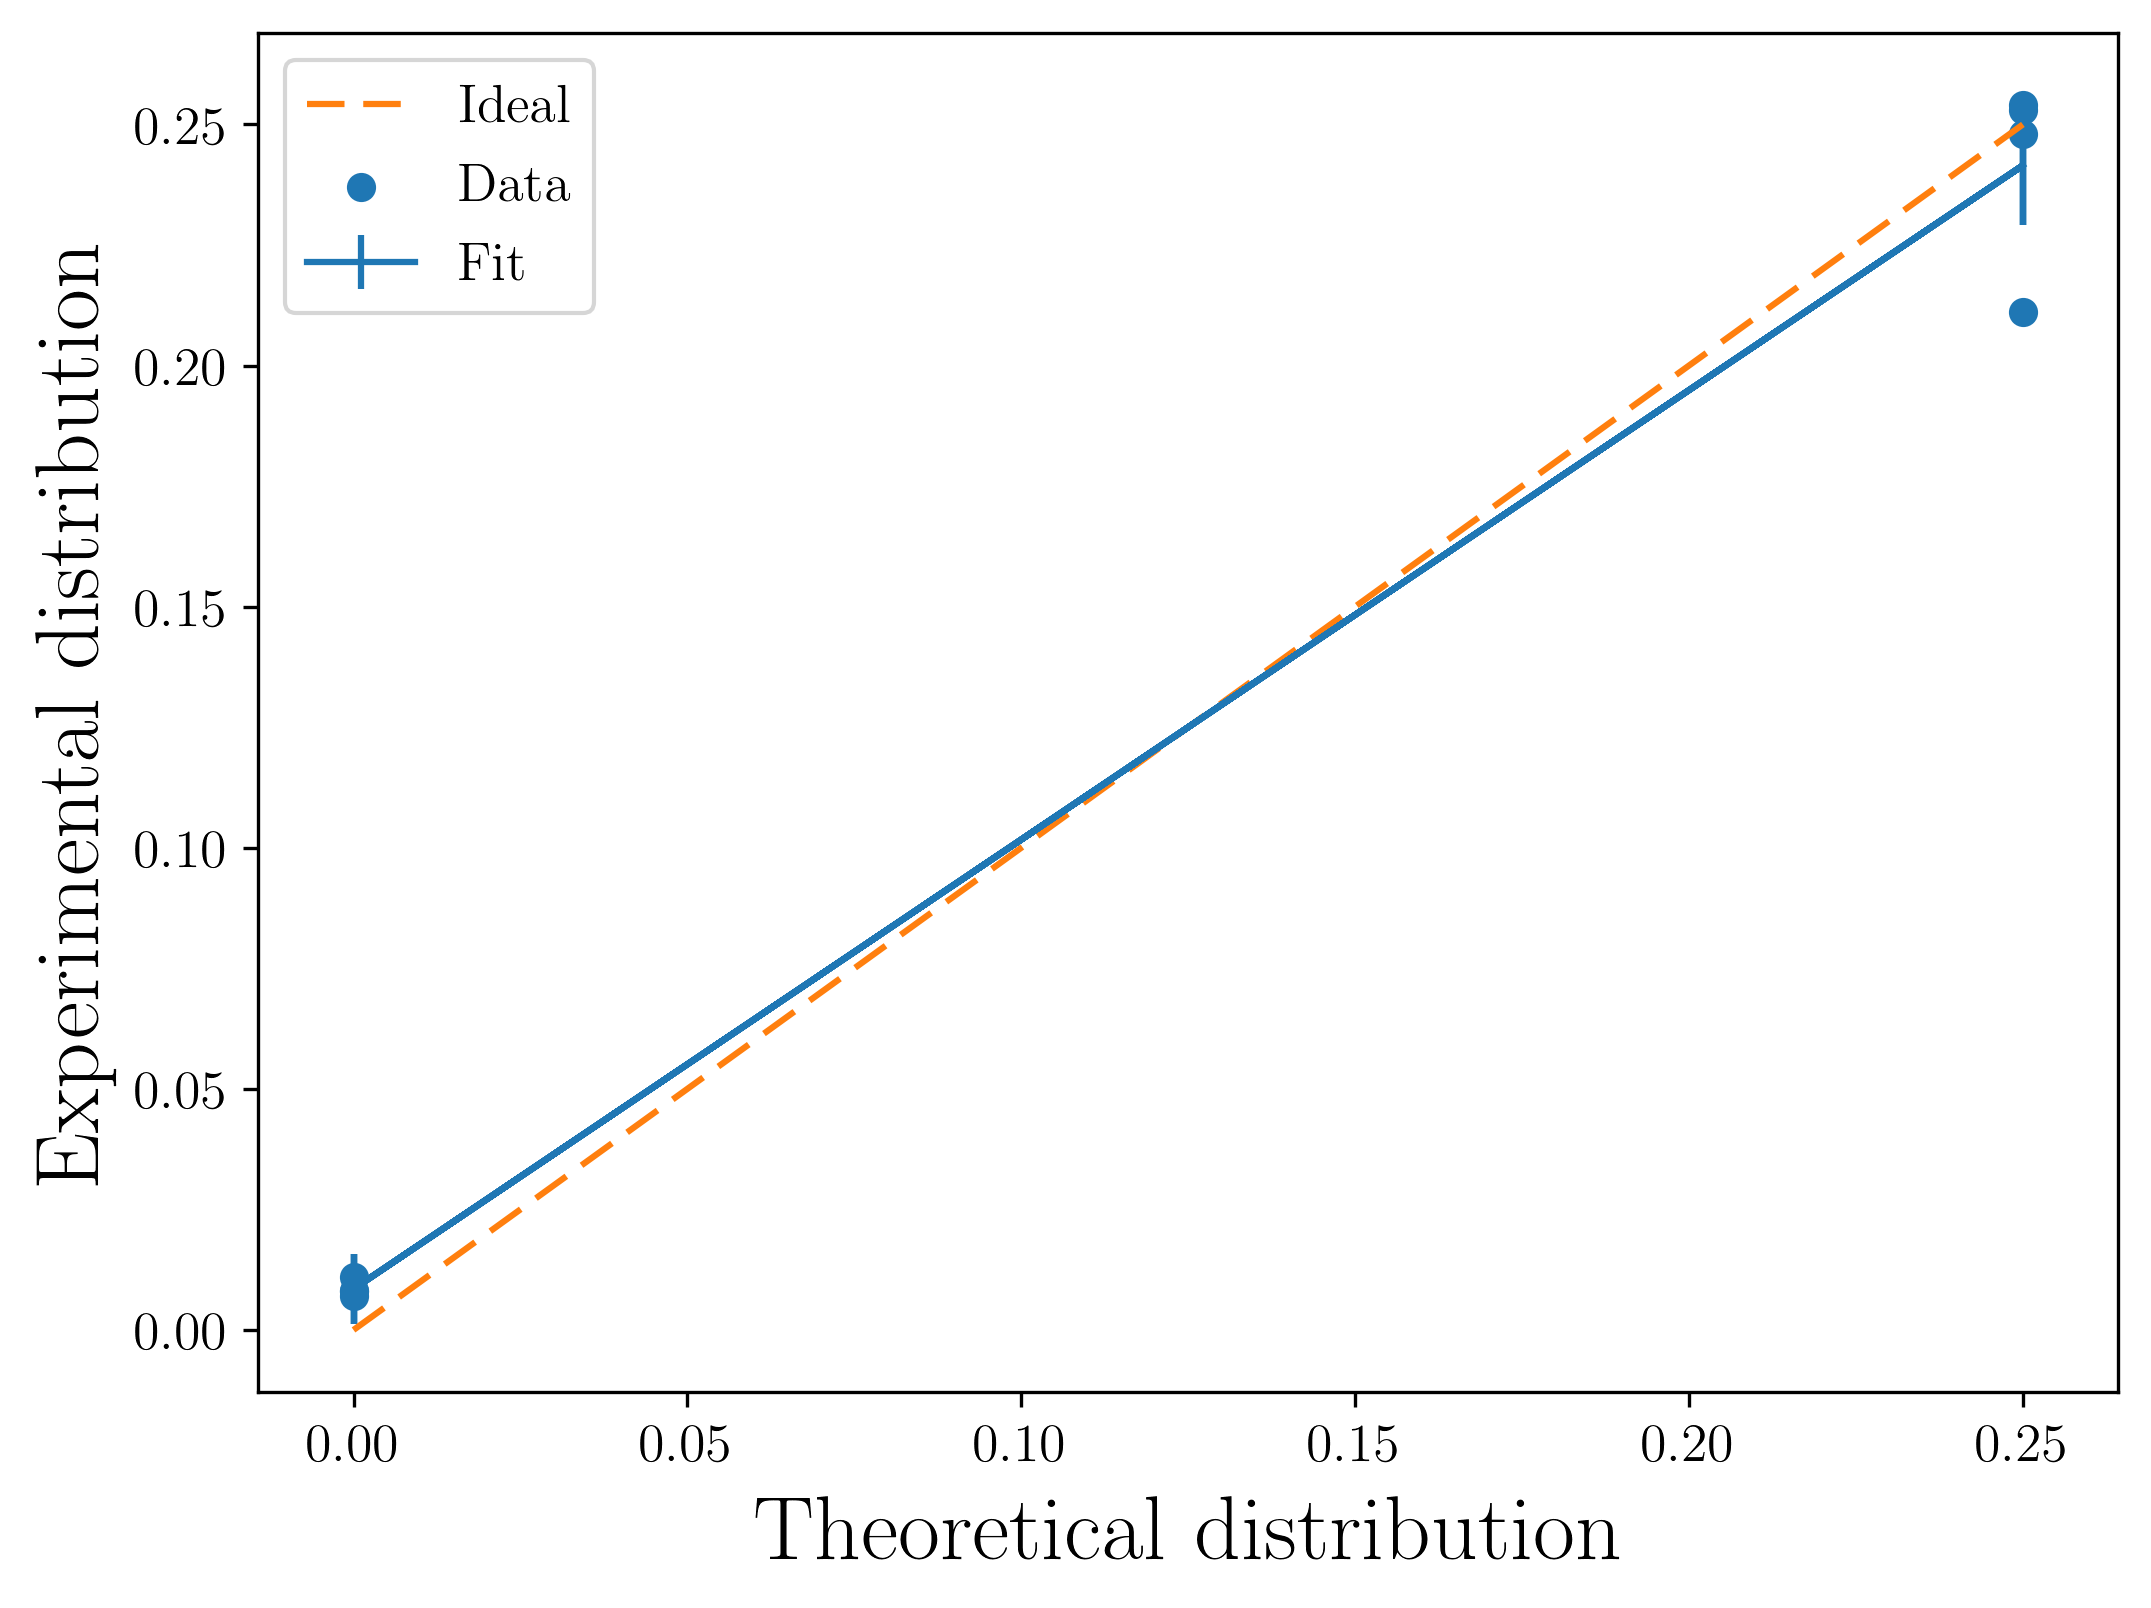

correlation coefficient:  0.9942024792062699
error on correlation coeff 0.003403615656795704
p-value:  4.850390022693014e-07


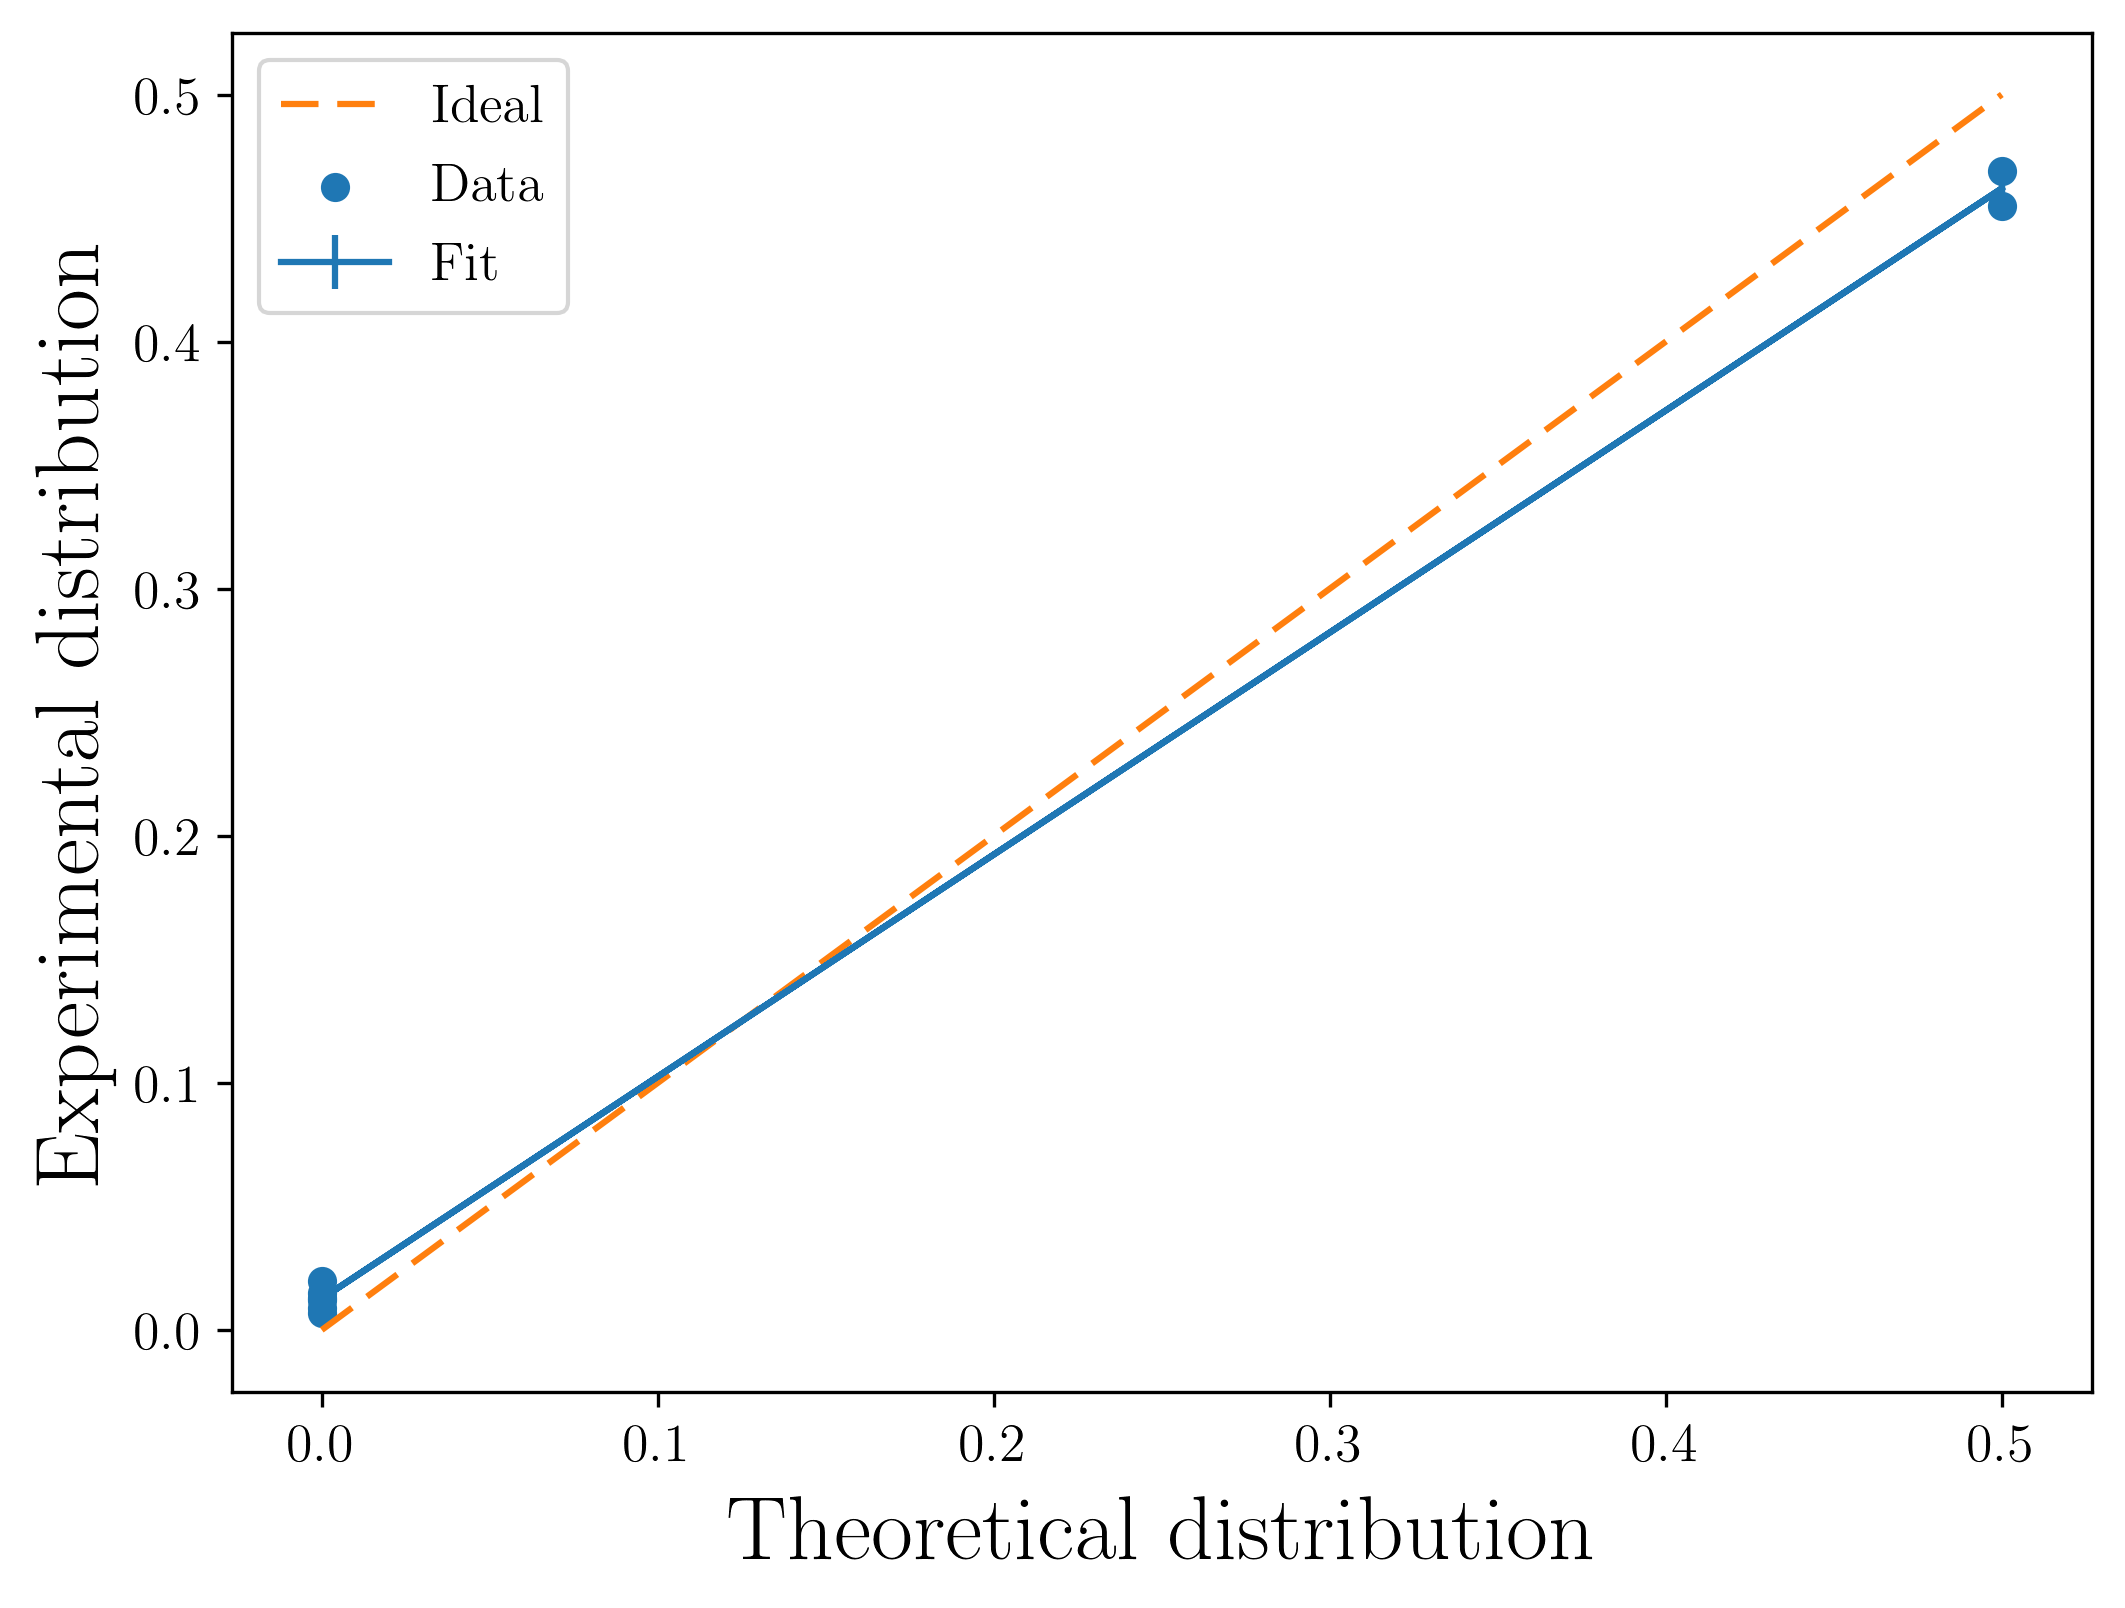

correlation coefficient:  0.9996644699438395
error on correlation coeff 0.0008199342145164533
p-value:  9.441152261499078e-11


In [13]:
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.stats import pearsonr
import numpy as np

#changes plot parameters
plt.rcParams.update({'font.size': 13})
plt.rcParams.update({'figure.autolayout': False})
# matplotlib.rcParams['mathtext.rm'] = 'Arial'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')




def pp_plot(exp, outcomes):
    x_data = np.zeros(len(outcomes))
    y_data = np.zeros(len(exp))

    #find cdf
    x_data = (outcomes)
    y_data = (exp)

    x = np.linspace(min(x_data),max(x_data),len(x_data))

    y_fit_err = np.zeros(len(exp))


    # define fit function
    def test_func(x, a, b):
        return a * x + b

    # find parameters of fit function which fit data starting with guess parameters p0
    # params[0] = a, params[1] = b
    params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[1,0])

    # find error on parameterds of the fit
    # params_err[0] = a_err, params_err[1] = b_err
    params_err = np.sqrt(np.diag(params_covariance))
    y_fit_err = np.sqrt( (test_func(x_data, params[0], params[1])*params_err[0])**2 + params_err[1]**2 )


#     print('fit parameters[angular coeff, offset]: ',params)
#     print('parameter errors',params_err)

    # plot data and fit
    plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
    plt.scatter(x_data, y_data, label='Data')
    plt.errorbar(x_data, test_func(x_data, params[0], params[1]), yerr =y_fit_err,  label='Fit')
    plt.plot(x,x, dashes=[6, 3], label='Ideal')
    plt.legend(loc='best')
    plt.xlabel("Theoretical distribution", fontsize=22)
    plt.ylabel("Experimental distribution", fontsize=22)
#     plt.title("a = 4, N=35")
    plt.savefig('%s.eps'%outcomes, dpi = 300)
    plt.show()
    
    print('correlation coefficient: ',pearsonr(outcomes, exp)[0])
    print('error on correlation coeff',np.sqrt((1-(pearsonr(outcomes, exp)[0])**2)/(1000-2)))
    print('p-value: ',pearsonr(outcomes, exp)[1])



def normalize(a, counts):
    #normalizes vector
    for i in range(len(a)):
        a[i] = a[i]/counts
    return a

def sso(exp,th):
    sqrt_sso = 0
    
#     exp_norm = normalize(exp)
    for i in range(len(exp)):
        sqrt_sso += np.sqrt(exp[i])*np.sqrt(th[i])
    
    return sqrt_sso**2

def sso_error(exp,th):
    counts_err = np.zeros(len(exp)) #array with errors on counts
    for i in range(len(exp)):
        counts_err[i] = np.sqrt(exp[i]) # counting error 
        
    sso_err = 0 #error on the SSO
    
    #calculates error on SSO from errors on counts using Gaussian propagation of error
    
    for i in range(len(exp)):
        sso_err += (th[i]*counts_err[i])**2
    
    sso_err = np.sqrt(sso_err)
        
    return sso_err

      
    

SHOTS = 1000

#load counts
a2 = np.load("a2_counts.npy")
a11 = np.load("a11_counts.npy")



# theoretical distribution of the period for a = 2
outcomes_r4 = np.zeros(8)
outcomes_r4[0] = 1/4
outcomes_r4[1] = 0
outcomes_r4[2] = 1/4
outcomes_r4[3] = 0
outcomes_r4[4] = 1/4
outcomes_r4[5] = 0
outcomes_r4[6] = 1/4
outcomes_r4[7] = 0


# theoretical distribution of the period for a = 11
outcomes_r2 = np.zeros(8)
outcomes_r2[0] = 1/2
outcomes_r2[1] = 0
outcomes_r2[2] = 0
outcomes_r2[3] = 0
outcomes_r2[4] = 1/2
outcomes_r2[5] = 0
outcomes_r2[6] = 0
outcomes_r2[7] = 0

# theoretical distribution of the period for a = NA, r = 6
outcomes_r6 = np.zeros(8)
outcomes_r6[0] = 3/16
outcomes_r6[1] = 1/8
outcomes_r6[2] = 1/16
outcomes_r6[3] = 1/8
outcomes_r6[4] = 3/16
outcomes_r6[5] = 1/8
outcomes_r6[6] = 1/16
outcomes_r6[7] = 1/8

# theoretical distribution of the period for a = NA, r = 3
outcomes_r3 = np.zeros(8)
outcomes_r3[0] = 33/96
outcomes_r3[1] = (4-2*np.sqrt(2))/32
outcomes_r3[2] = 1/16
outcomes_r3[3] = (4+2*np.sqrt(2))/32
outcomes_r3[4] = 3/96
outcomes_r3[5] = (4+2*np.sqrt(2))/32
outcomes_r3[6] = 1/16
outcomes_r3[7] = (4-2*np.sqrt(2))/32

# theoretical distribution of the period for a = NA, r=5
outcomes_r5 = np.zeros(8)
outcomes_r5[0] = 7/32
outcomes_r5[1] = (8-3*np.sqrt(2))/64
outcomes_r5[2] = 1/8
outcomes_r5[3] = (8+3*np.sqrt(2))/64
outcomes_r5[4] = 1/32
outcomes_r5[5] = (8+3*np.sqrt(2))/64
outcomes_r5[6] = 1/8
outcomes_r5[7] = (8-3*np.sqrt(2))/64

# theoretical distribution of the period for a = NA, r=7
outcomes_r7 = np.zeros(8)
outcomes_r7[0] = 5/32
outcomes_r7[1] = (8+np.sqrt(2))/64
outcomes_r7[2] = 1/8
outcomes_r7[3] = (8-np.sqrt(2))/64
outcomes_r7[4] = 3/32
outcomes_r7[5] = (8-np.sqrt(2))/64
outcomes_r7[6] = 1/8
outcomes_r7[7] = (8+np.sqrt(2))/64




# SSO

#exp with a=2
print('sso between experiment and theory for an input state (a=2) with period r=4', sso(a2,outcomes_r4*SHOTS)/(SHOTS**2), "with error: ", sso_error(a2,outcomes_r4*SHOTS)/(SHOTS**2))



#exp with a = 11
print('sso between experiment and theory for an input state (a=11) with period r=2', sso(a11,outcomes_r2*SHOTS)/(SHOTS**2), "with error: ", sso_error(a11,outcomes_r2*SHOTS)/(SHOTS**2))


# exp a = 2
pp_plot(a2/SHOTS, outcomes_r4)



# exp a = 11
pp_plot(a11/SHOTS, outcomes_r2)




/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


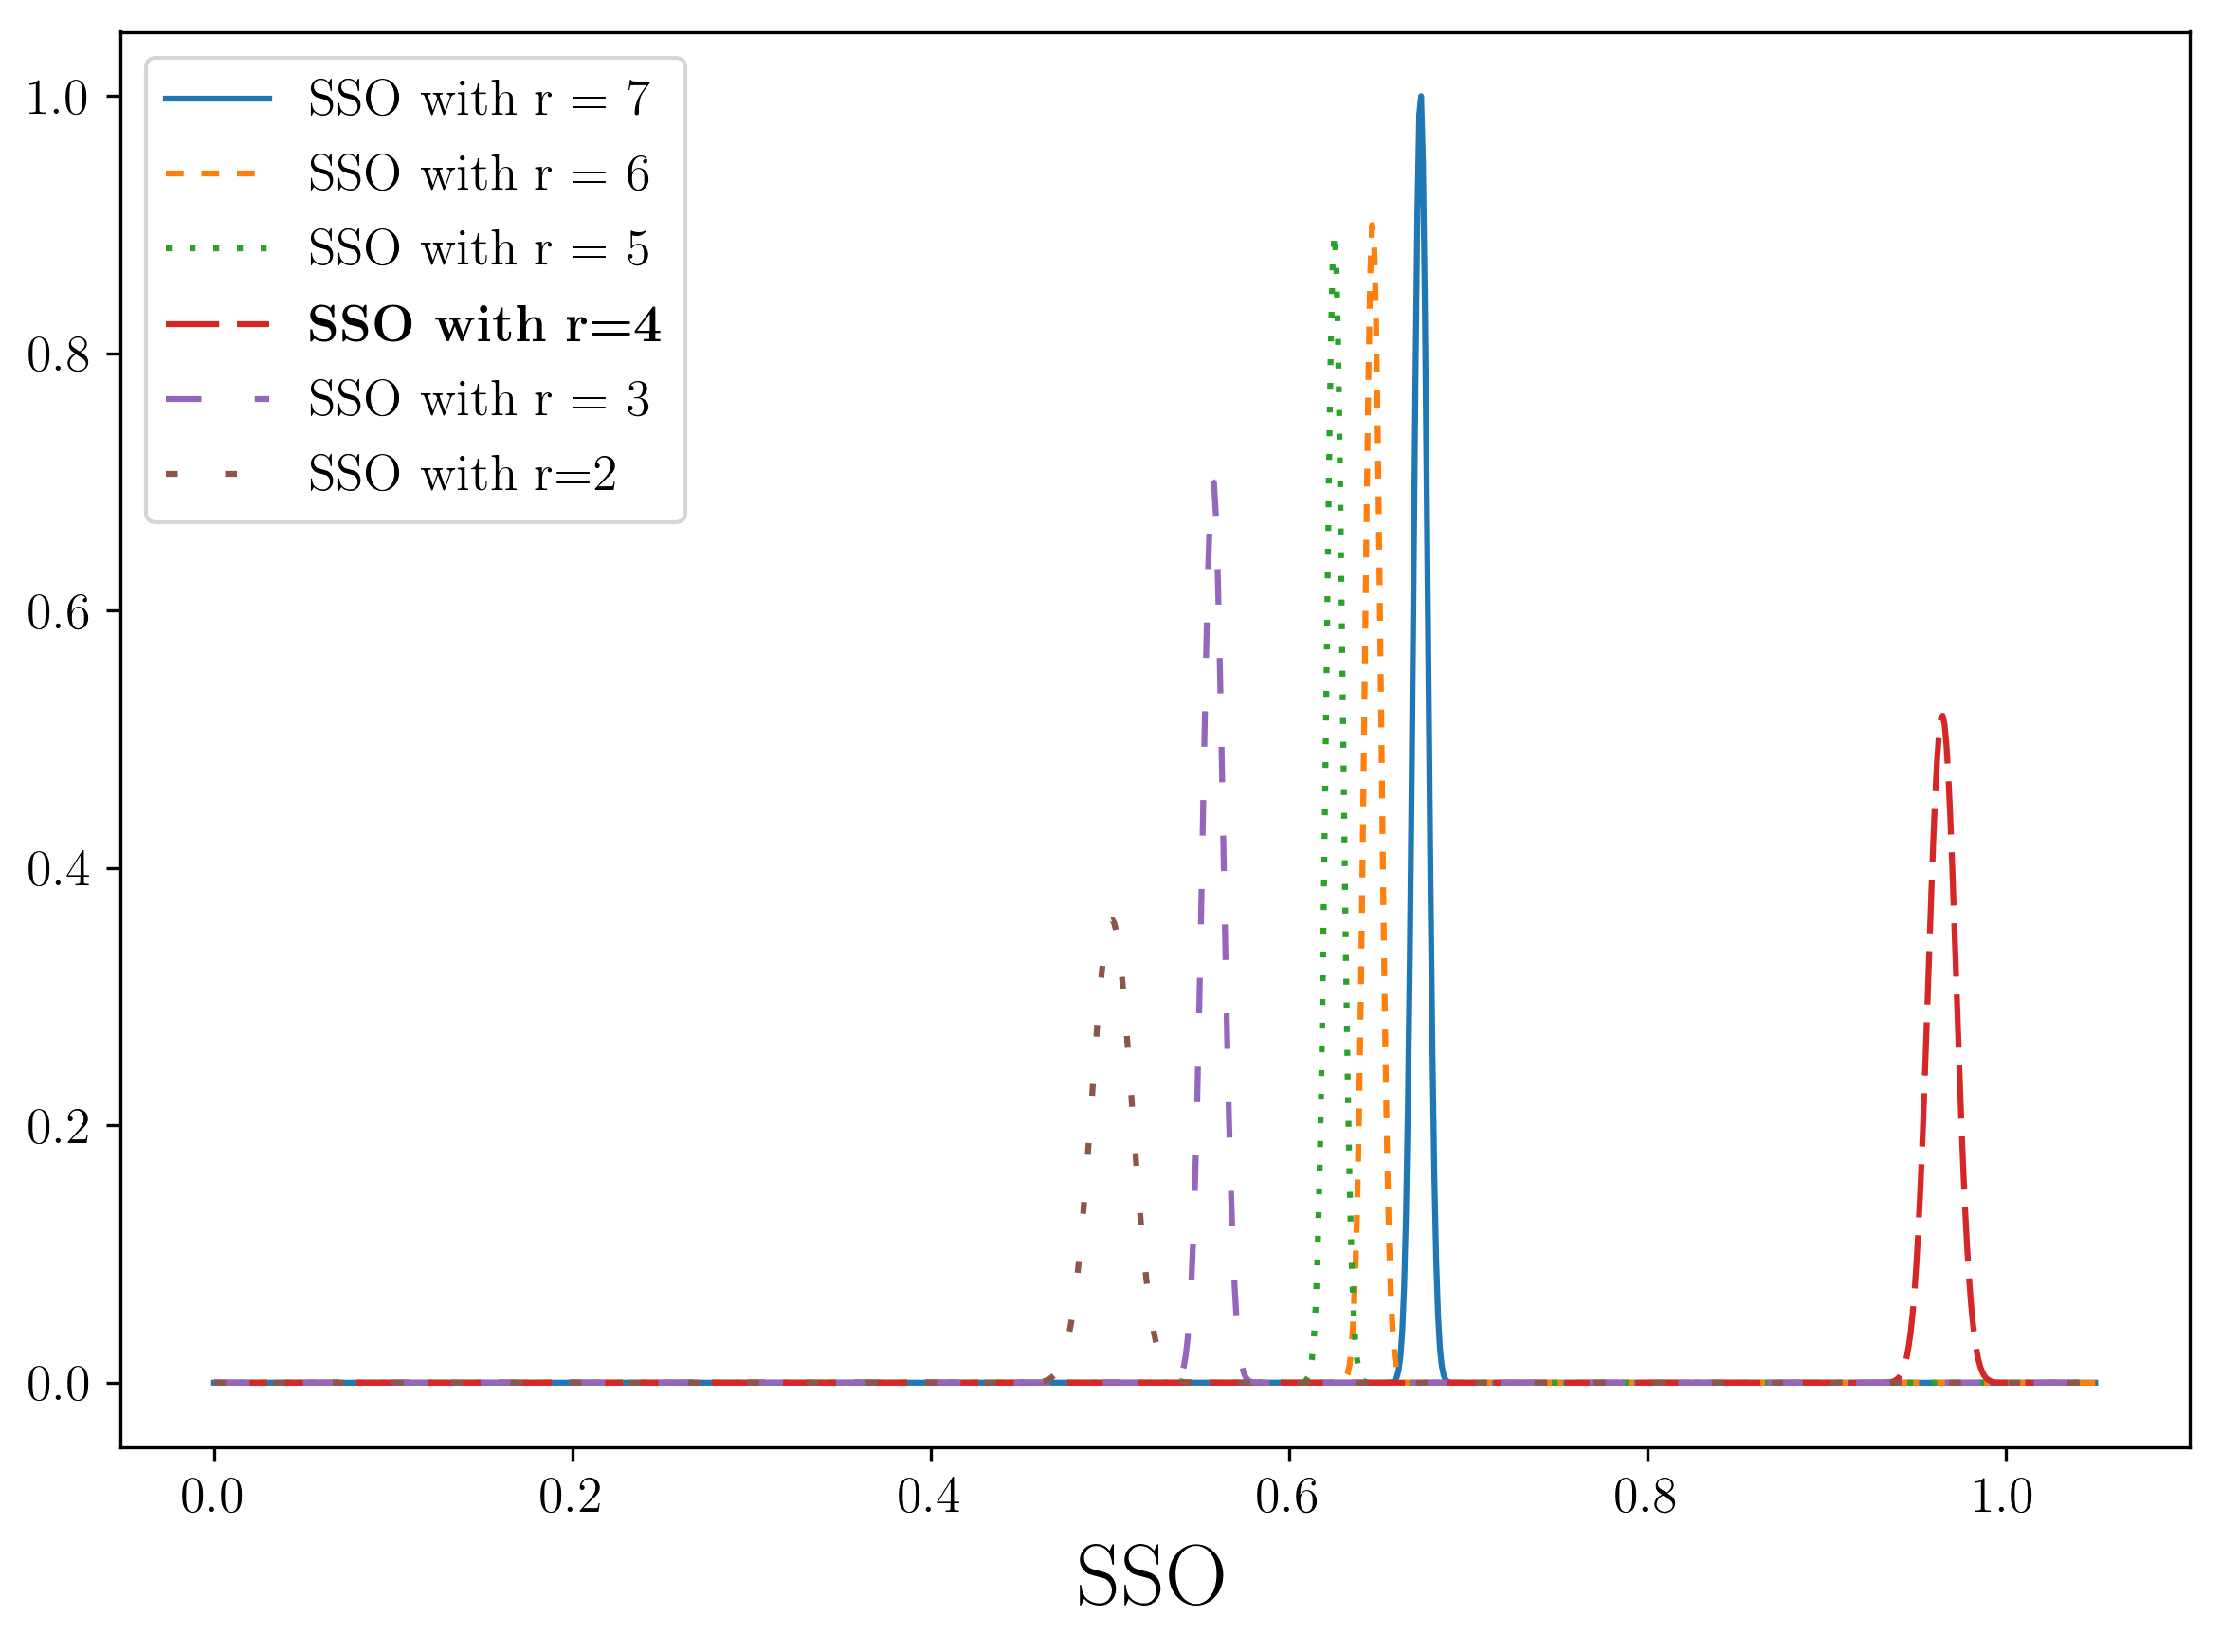

59.670686108505144


/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


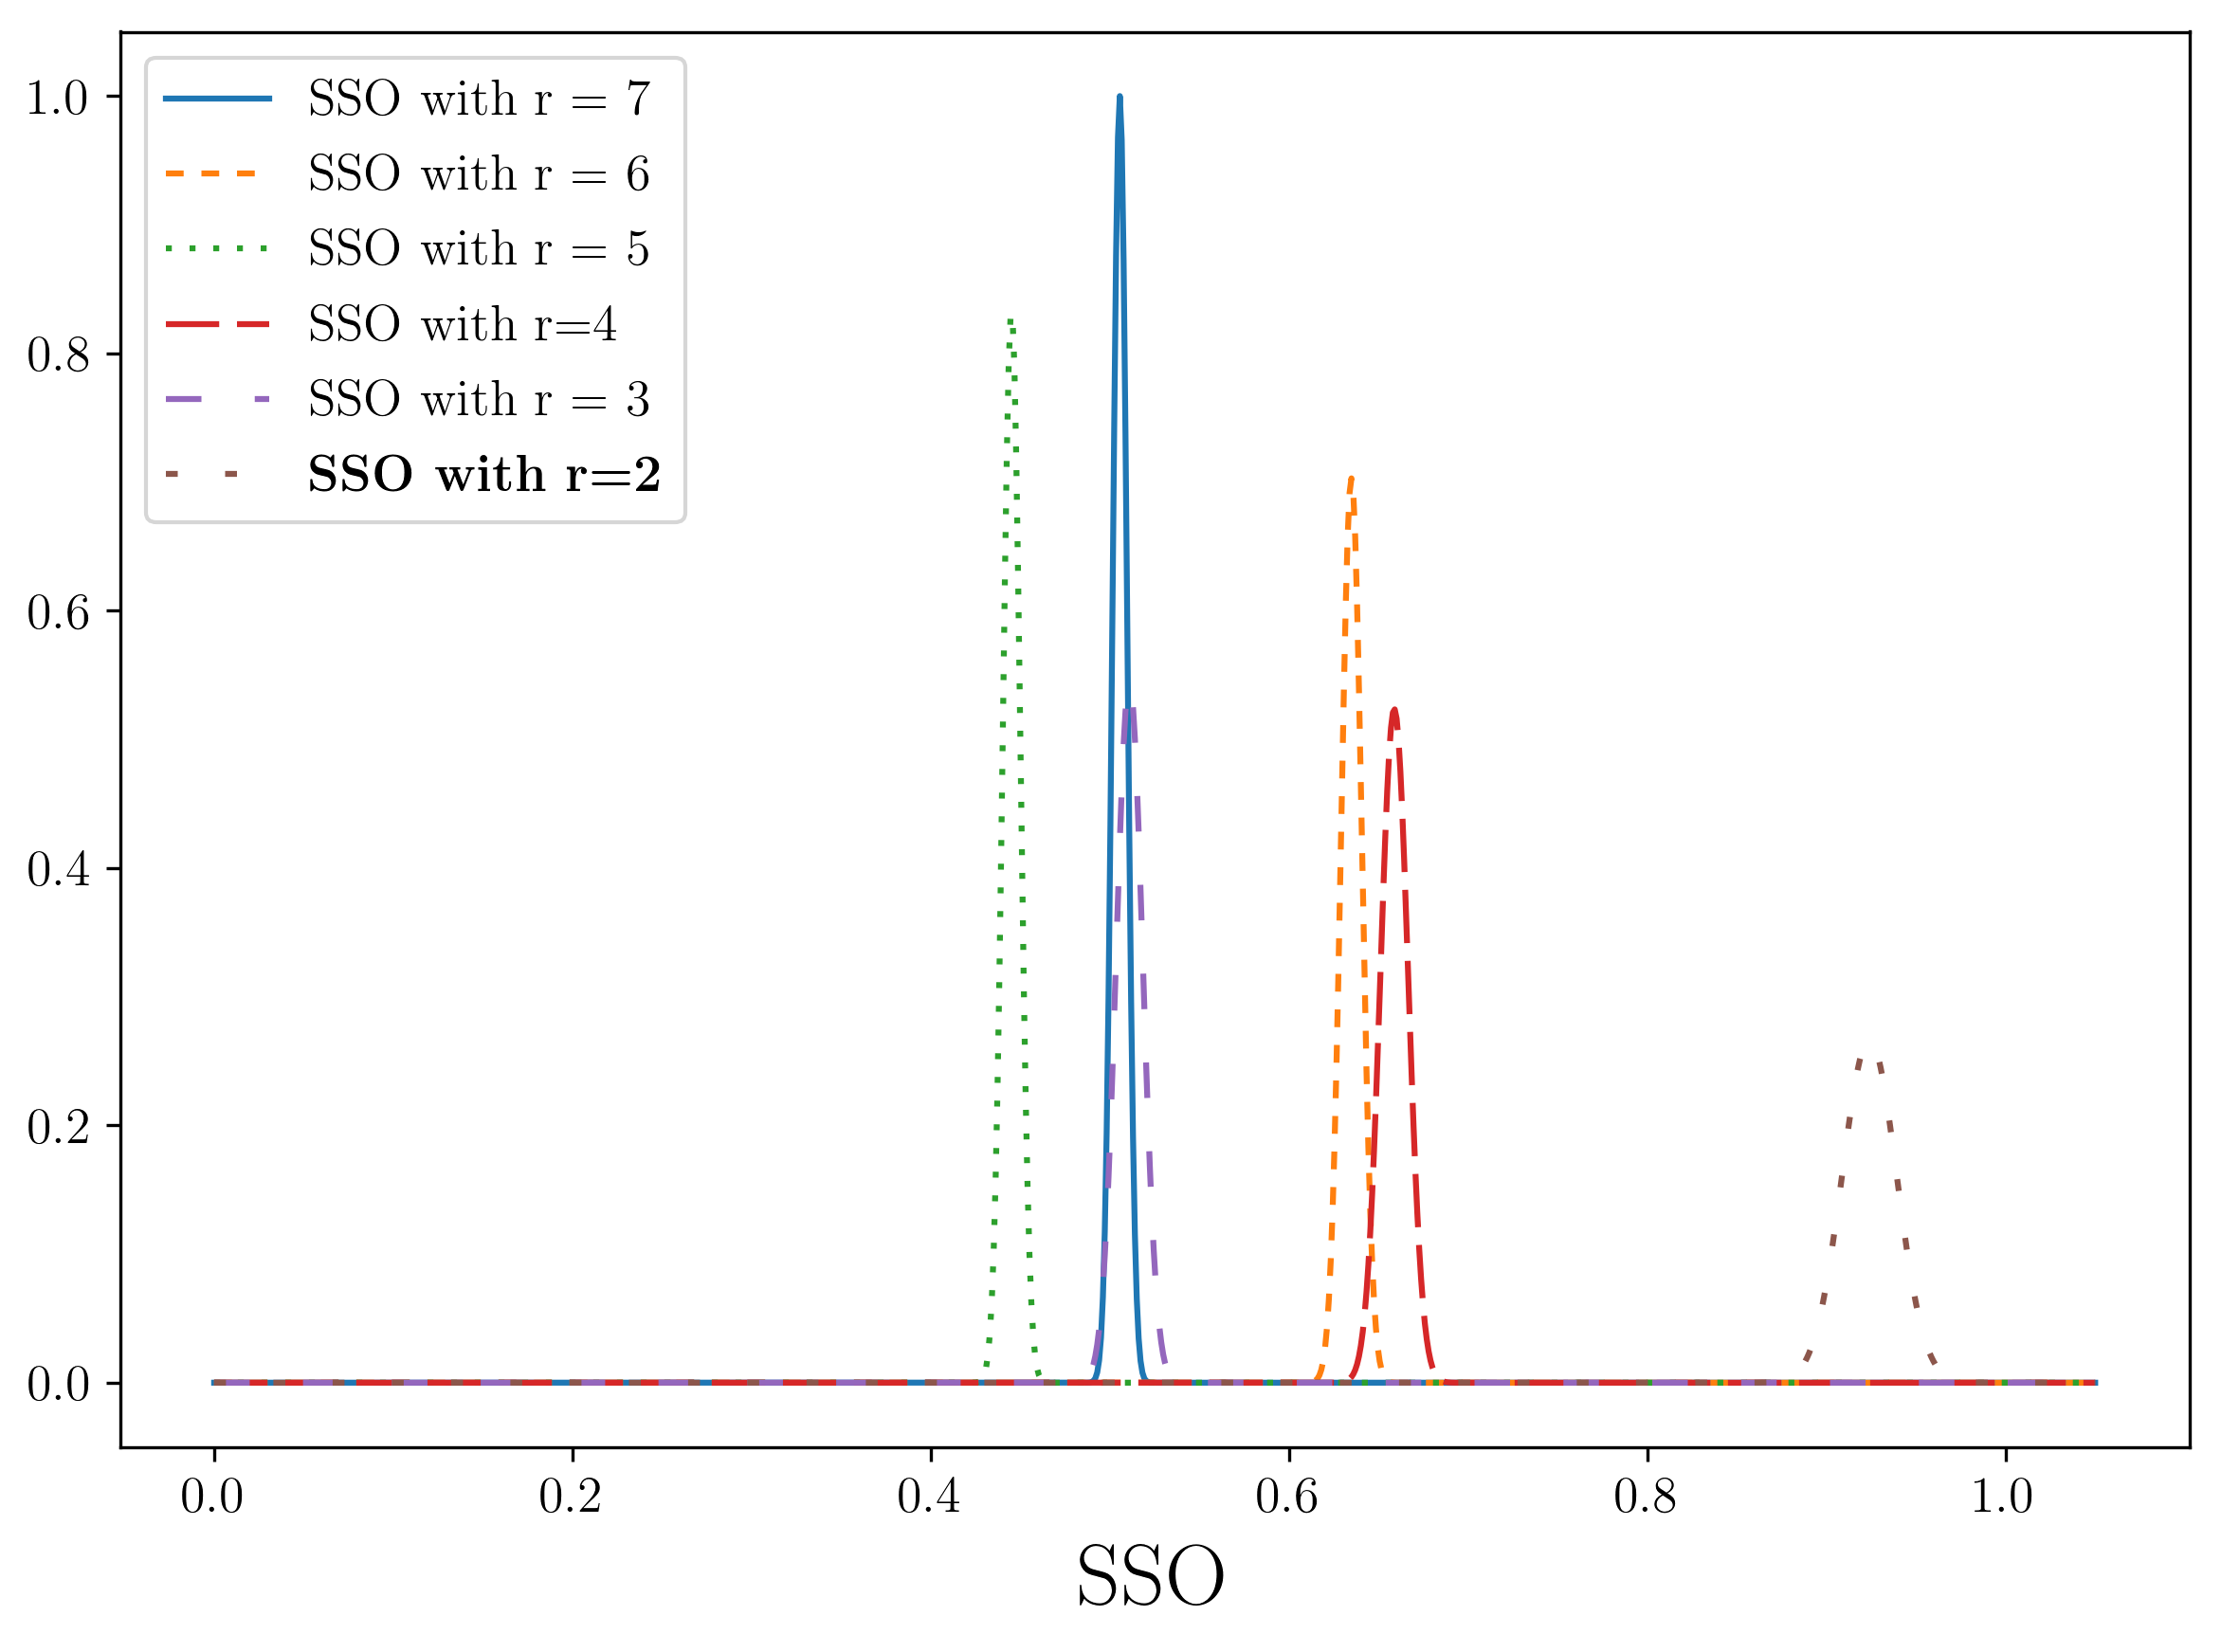

17.448670816151026


In [18]:
import pylab
import numpy as np
from scipy.stats import norm

#changes plot parameters
plt.rcParams.update({'font.size': 13})
plt.rcParams.update({'figure.autolayout': True})
# matplotlib.rcParams['mathtext.rm'] = 'Arial'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


## Relative SSO

## a = 2
x = np.linspace(0,1.05,1000)


plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')

y_6 = norm.pdf(x, loc=sso(a2,outcomes_r7*SHOTS)/(SHOTS**2), scale=sso_error(a2,outcomes_r7*SHOTS)/(SHOTS**2))    # loc = mean, scale = standard deviation
norm_fac = max(y_6) # find normalization factor
pylab.plot(x,y_6/norm_fac, label = 'SSO with r = 7')

y_3 = norm.pdf(x, loc=sso(a2,outcomes_r6*SHOTS)/(SHOTS**2), scale=sso_error(a2,outcomes_r6*SHOTS)/(SHOTS**2))    # loc = mean, scale = standard deviation
pylab.plot(x,y_3/norm_fac,dashes=[3, 3], label = 'SSO with r = 6')

y_5 = norm.pdf(x, loc=sso(a2,outcomes_r5*SHOTS)/(SHOTS**2), scale=sso_error(a2,outcomes_r5*SHOTS)/(SHOTS**2))    # loc = mean, scale = standard deviation
pylab.plot(x,y_5/norm_fac,dashes=[1, 3], label = 'SSO with r = 5')

y_1 = norm.pdf(x, loc=sso(a2,outcomes_r4*SHOTS)/(SHOTS**2), scale=sso_error(a2,outcomes_r4*SHOTS)/(SHOTS**2))    # loc = mean, scale = standard deviation
pylab.plot(x,y_1/norm_fac,dashes=[9, 3], label=r"\textbf{SSO with r=4}")

y_4 = norm.pdf(x, loc=sso(a2,outcomes_r3*SHOTS)/(SHOTS**2), scale=sso_error(a2,outcomes_r3*SHOTS)/(SHOTS**2))    # loc = mean, scale = standard deviation
pylab.plot(x,y_4/norm_fac,dashes=[6, 9], label = 'SSO with r = 3')

y_2 = norm.pdf(x, loc=sso(a2,outcomes_r2*SHOTS)/(SHOTS**2), scale=sso_error(a2,outcomes_r2*SHOTS)/(SHOTS**2))    # loc = mean, scale = standard deviation
pylab.plot(x,y_2/norm_fac,dashes=[2, 8], label="SSO with r=2")


# plt.title("a = 2, N=15, r=4")
plt.legend(loc='upper left')
plt.xlabel("SSO", fontsize=22)

plt.savefig('a2_sso.eps', dpi = 300)
pylab.show()

print((sso(a2,outcomes_r4*SHOTS)/(SHOTS**2) - sso(a2,outcomes_r2*SHOTS)/(SHOTS**2))/(sso_error(a2,outcomes_r4*SHOTS)/(SHOTS**2)))

# a = 11
x = np.linspace(0,1.05,1000)

plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')

y_6 = norm.pdf(x, loc=sso(a11,outcomes_r7*SHOTS)/(SHOTS**2), scale=sso_error(a11,outcomes_r7*SHOTS)/(SHOTS**2))    # loc = mean, scale = standard deviation
norm_fac = max(y_6) # find normalization factor
pylab.plot(x,y_6/norm_fac, label = 'SSO with r = 7')

y_3 = norm.pdf(x, loc=sso(a11,outcomes_r6*SHOTS)/(SHOTS**2), scale=sso_error(a11,outcomes_r6*SHOTS)/(SHOTS**2))    # loc = mean, scale = standard deviation
pylab.plot(x,y_3/norm_fac, dashes=[3, 3], label = 'SSO with r = 6')

y_5 = norm.pdf(x, loc=sso(a11,outcomes_r5*SHOTS)/(SHOTS**2), scale=sso_error(a11,outcomes_r5*SHOTS)/(SHOTS**2))    # loc = mean, scale = standard deviation
pylab.plot(x,y_5/norm_fac, dashes=[1, 3], label = 'SSO with r = 5')

y_1 = norm.pdf(x, loc=sso(a11,outcomes_r4*SHOTS)/(SHOTS**2), scale=sso_error(a11,outcomes_r4*SHOTS)/(SHOTS**2))    # loc = mean, scale = standard deviation
pylab.plot(x,y_1/norm_fac, dashes=[9, 3], label="SSO with r=4")

y_4 = norm.pdf(x, loc=sso(a11,outcomes_r3*SHOTS)/(SHOTS**2), scale=sso_error(a11,outcomes_r3*SHOTS)/(SHOTS**2))    # loc = mean, scale = standard deviation
pylab.plot(x,y_4/norm_fac, dashes=[6, 9], label = 'SSO with r = 3')

y_2 = norm.pdf(x, loc=sso(a11,outcomes_r2*SHOTS)/(SHOTS**2), scale=sso_error(a11,outcomes_r2*SHOTS)/(SHOTS**2))    # loc = mean, scale = standard deviation
pylab.plot(x,y_2/norm_fac, dashes=[2, 8], label=r"\textbf{SSO with r=2}")









# plt.title("a = 11, N=15, r=2")
plt.legend(loc='upper left')
plt.xlabel("SSO", fontsize=22)

plt.savefig('a11_sso.eps', dpi = 300)
pylab.show()

print(np.abs(sso(a11,outcomes_r4*SHOTS)/(SHOTS**2) - sso(a11,outcomes_r2*SHOTS)/(SHOTS**2))/(sso_error(a11,outcomes_r2*SHOTS)/(SHOTS**2)))

